In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


imported libarries

In [9]:
cols=["fLenght","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

fLenght    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

we imported the data and the data didnt have proper colunm name so we make a column and merge them .
we are initializing the data with column to df

In [10]:
df["class"]=(df["class"]=="g").astype(int)

if the class is gamma then we are converting to 1 and anotherb to 0

In [11]:
df.head()

fLenght    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

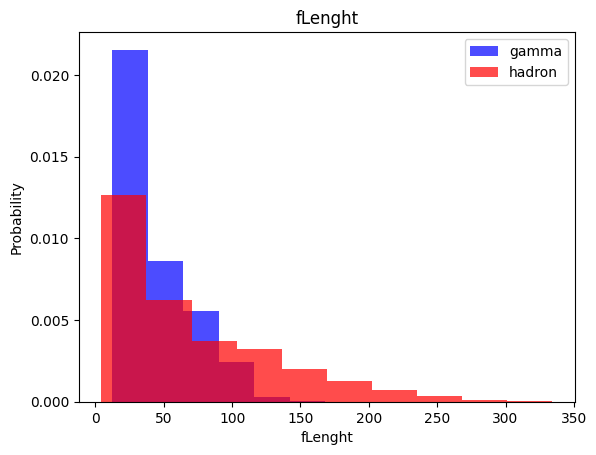

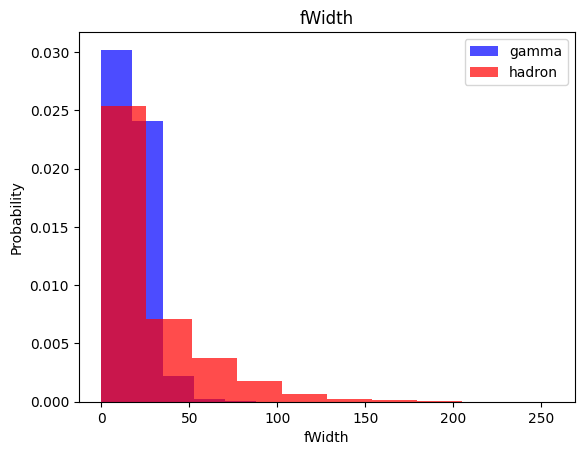

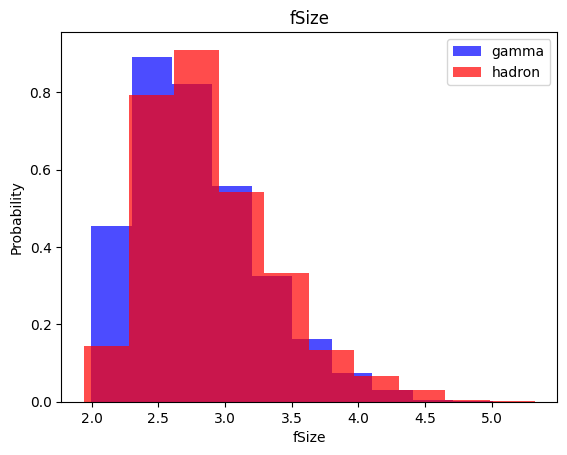

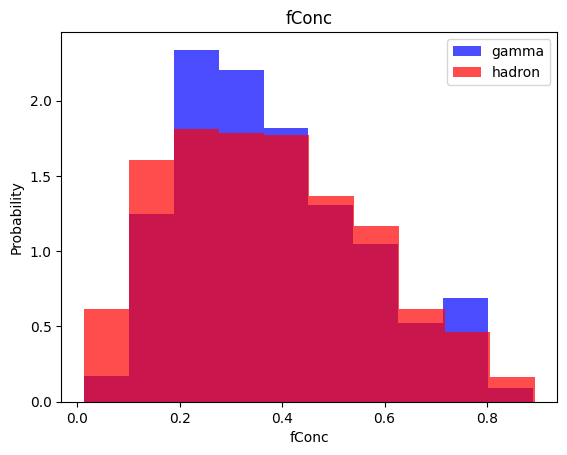

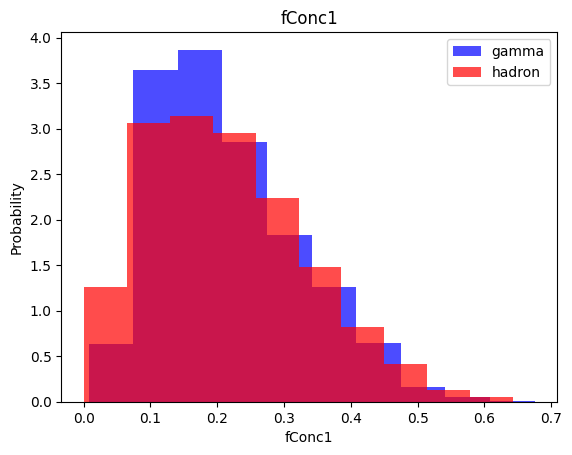

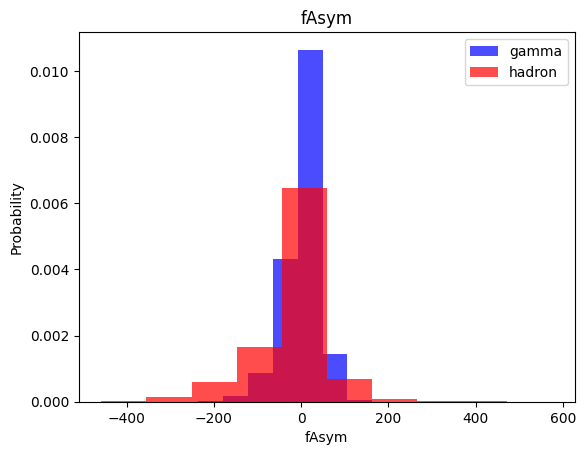

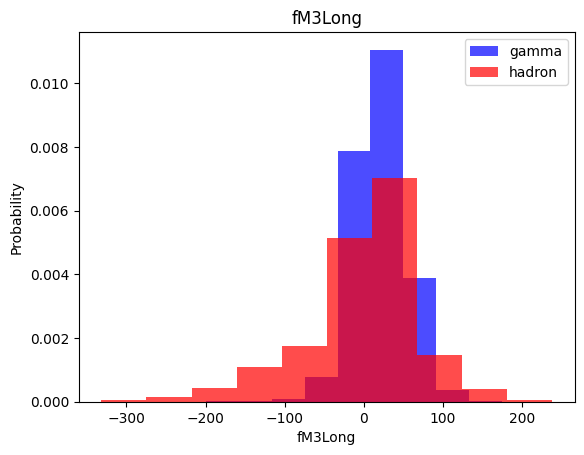

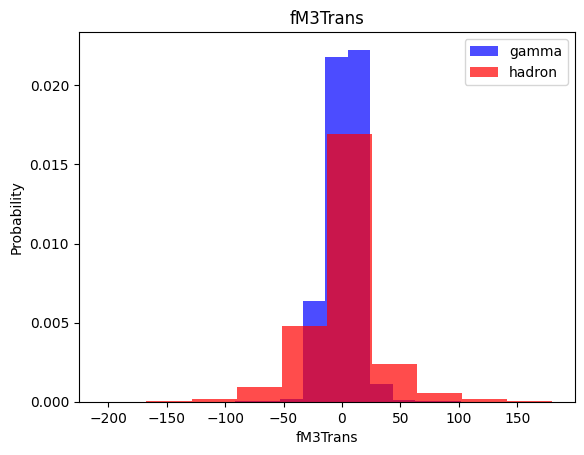

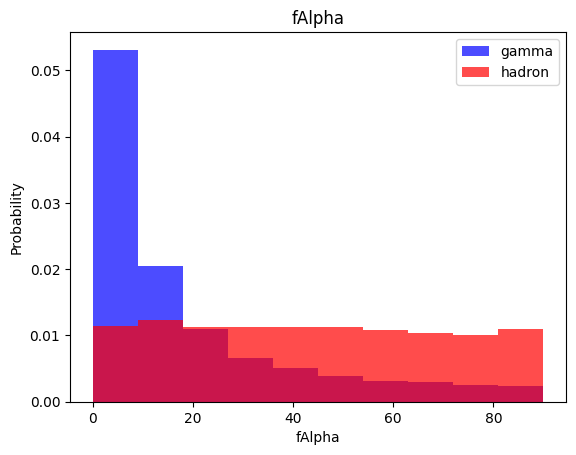

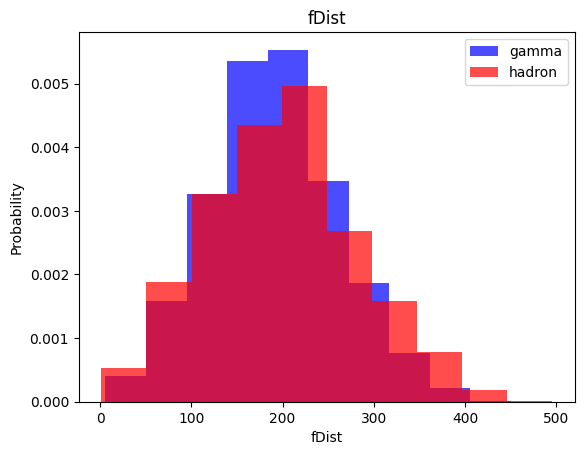

In [12]:
for label in cols[:-1]:
 plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
 plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
 plt.title(label)
 plt.ylabel("Probability")
 plt.xlabel(label)
 plt.legend()
 plt.show()

Trining, VAlidate,Test the data
in histogram using for loop distributing gamma and hadron
dataframe



In [13]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

here we do 60to 80  per of data will go to validation and rest 80 to 100 will go to testing of the data ..-1 means up to the last

In [14]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

a function called scale_
which  will fit the values in the dataset , as some column have large range of values whereas some have samller range of value.
we put the values in x and y . x is 2D but y is 1 D. so we reshape the x .
fit transform is a  function

In [15]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

this fits the data to the knn

In [18]:
y_pred=knn_model.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1343
           1       0.84      0.88      0.86      2461

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayers

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)

In [22]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52      1343
           1       0.74      0.90      0.81      2461

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



#Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)

In [26]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1343
           1       0.84      0.82      0.83      2461

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



#support vector Machines

In [27]:
from sklearn.svm import SVC

In [28]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)

In [29]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1343
           1       0.89      0.90      0.90      2461

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Network


In [30]:
import tensorflow as tf

In [33]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

we need to compile the tf and we have made 32 dots which have joined next 32 dots which have joined 1 output which is of sigmoid

* takes the training history of a model as input and plots the training and validation loss and accuracy over epochs*

**history**:

This object contains the record of training loss, validation loss, training accuracy, and validation accuracy for each epoch.

plt.subplots: Creates a figure with two subplots side-by-side.

ax1.plot: Plots the training and validation loss.

ax2.plot: Plots the training and validation accuracy.

plt.show: Displays the plots.

In [34]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

verbos=0 means to not print anything

*The train_model function defines and trains a neural network model based on the provided hyperparameters.*

X_train, y_train: Training data and labels.

num_nodes: Number of neurons in the dense layers.

dropout_prob: Dropout rate for the dropout layers to prevent overfitting.

lr: Learning rate for the optimizer.

batch_size: Number of samples per gradient update.

epochs: Number of times the entire training dataset is passed forward and backward through the neural network.


**Training Loop**

This part of the code iterates over different hyperparameters to train multiple models and selects the one with the lowest validation loss.


Hyperparameter Grid:

num_nodes: [16, 32, 64] - Number of neurons in each layer.

dropout_prob: [0, 0.2] - Dropout rate.

lr: [0.01, 0.005, 0.001] - Learning rate.

batch_size: [32, 64, 128] - Batch size.



**Training and Evaluation:**

print:  Prints the current combination of hyperparameters being tested.
train_model: Trains the model with the given hyperparameters.
plot_history: Plots the training history.
model.evaluate: Evaluates the model on the validation set to get the validation loss.
if val_loss < least_val_loss: Updates the least validation loss and the corresponding model if the current model's validation loss is lower.


**Keywords and Concepts**

Epochs: The number of complete passes through the training dataset.

Dropout: A regularization technique where randomly selected neurons are ignored during training to prevent overfitting.

Batch Size: The number of training samples used in one iteration to update the model parameters.

Learning Rate (lr): The step size at each iteration while moving towards a minimum of the loss function.

Validation Split: The fraction of the training data used as validation data.


**Intentions**

Hyperparameter Tuning: To find the best combination of hyperparameters that result in the lowest validation loss.

Model Evaluation: To assess model performance and ensure it generalizes well to unseen data.

Visualization: To monitor the training process and diagnose potential issues like overfitting or underfitting.


16 nodes, dropout 0, lr 0.01, batch size 32


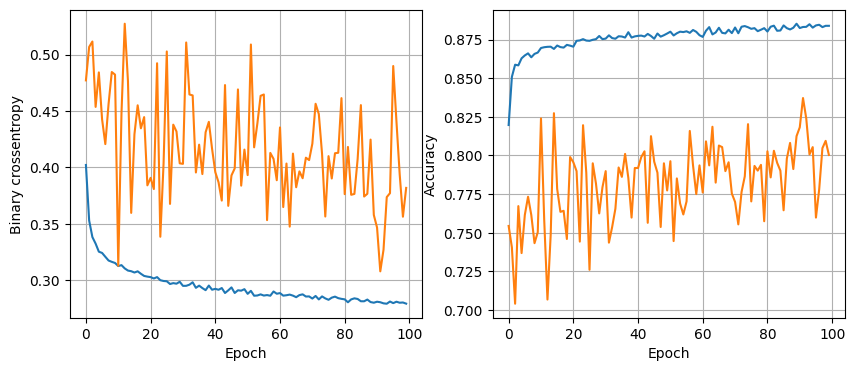

119/119 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8630
16 nodes, dropout 0, lr 0.01, batch size 64


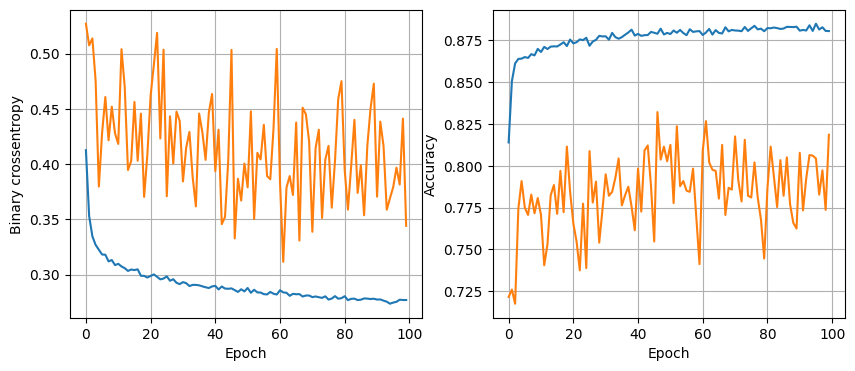

119/119 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8672
16 nodes, dropout 0, lr 0.01, batch size 128


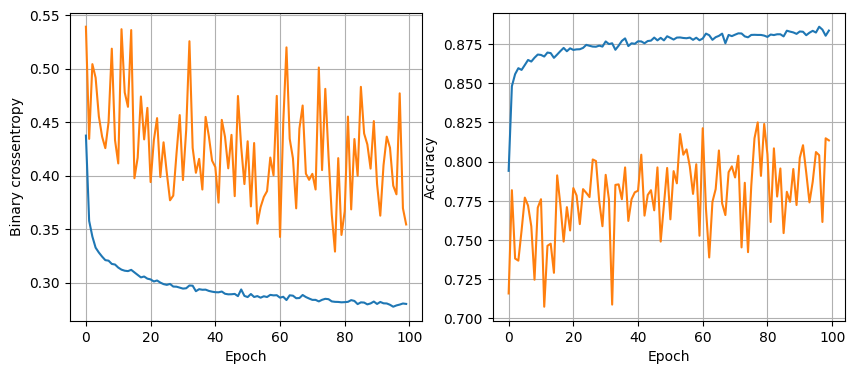

119/119 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.005, batch size 32


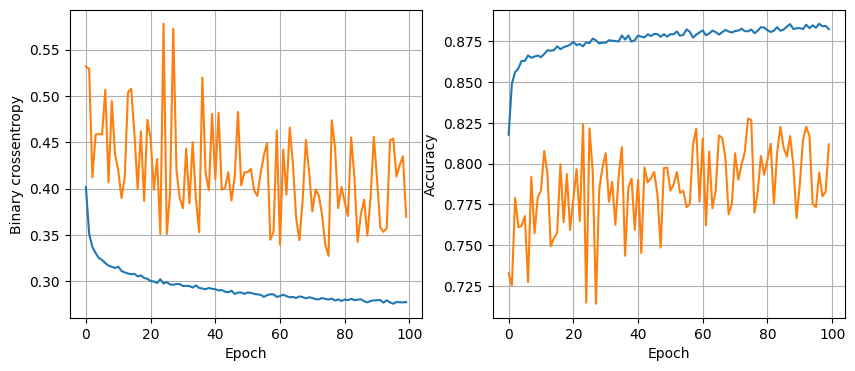

119/119 [==============================] - 0s 2ms/step - loss: 0.3218 - accuracy: 0.8628
16 nodes, dropout 0, lr 0.005, batch size 64


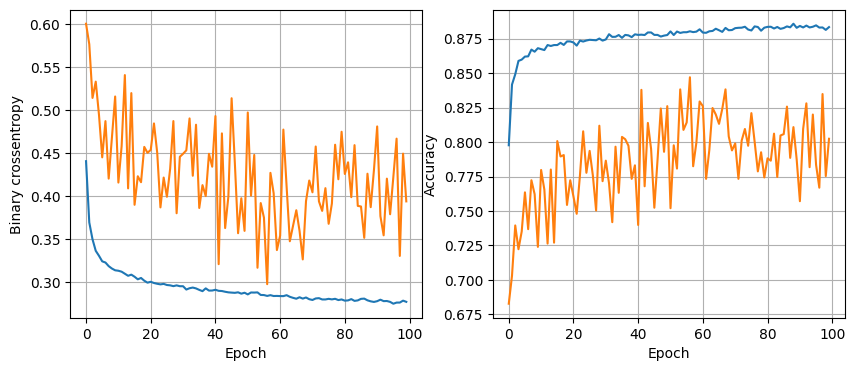

119/119 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8633
16 nodes, dropout 0, lr 0.005, batch size 128


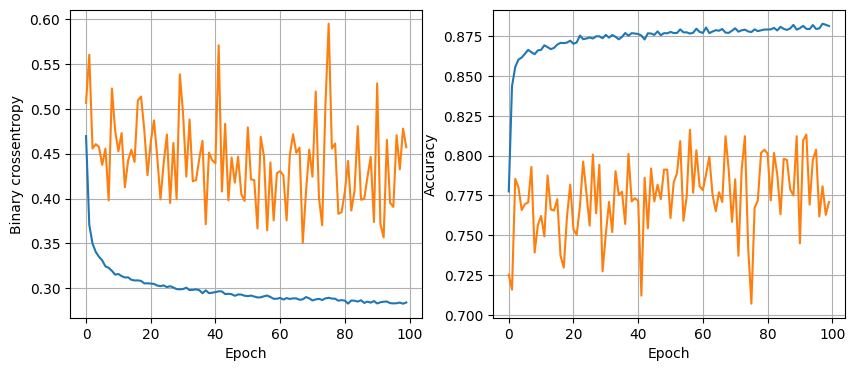

119/119 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.001, batch size 32


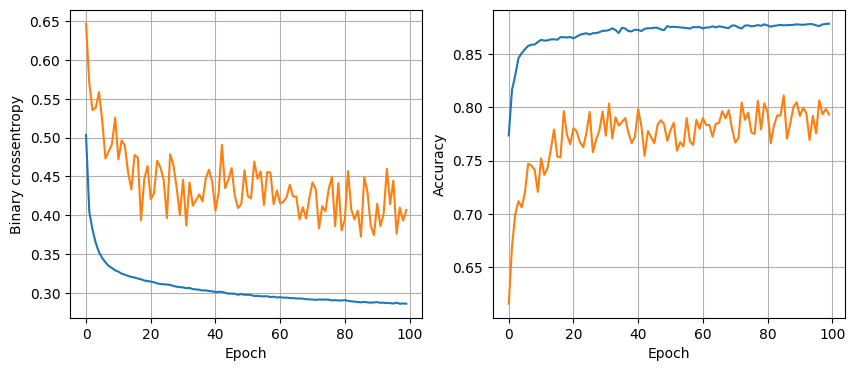

119/119 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8680
16 nodes, dropout 0, lr 0.001, batch size 64


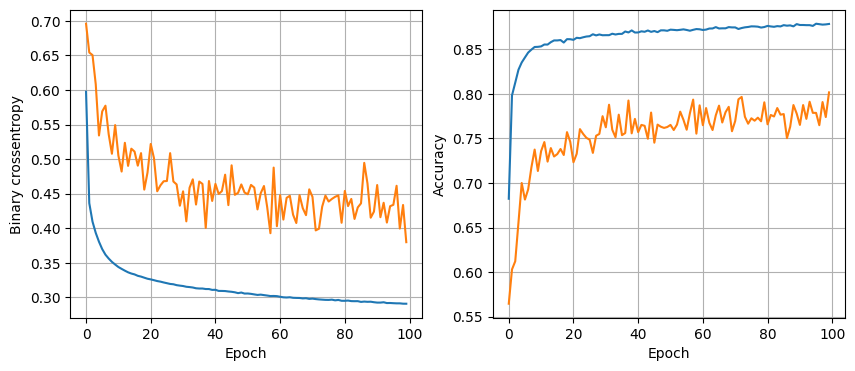

119/119 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8662
16 nodes, dropout 0, lr 0.001, batch size 128


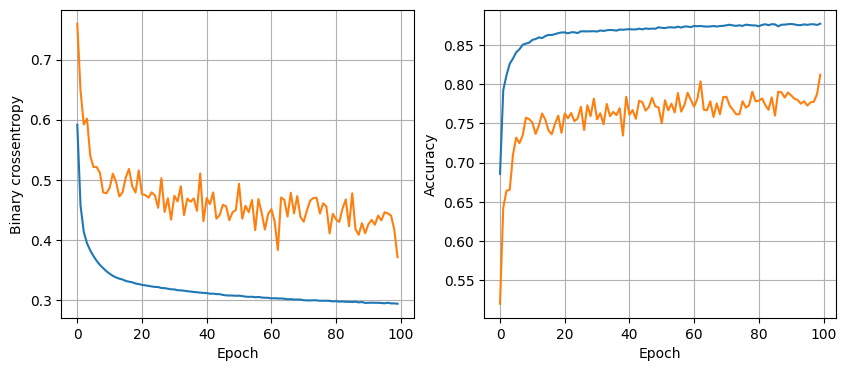

119/119 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8675
16 nodes, dropout 0.2, lr 0.01, batch size 32


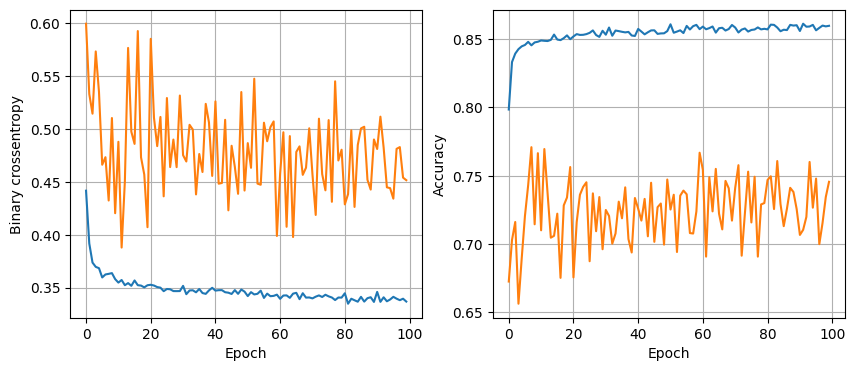

119/119 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8672
16 nodes, dropout 0.2, lr 0.01, batch size 64


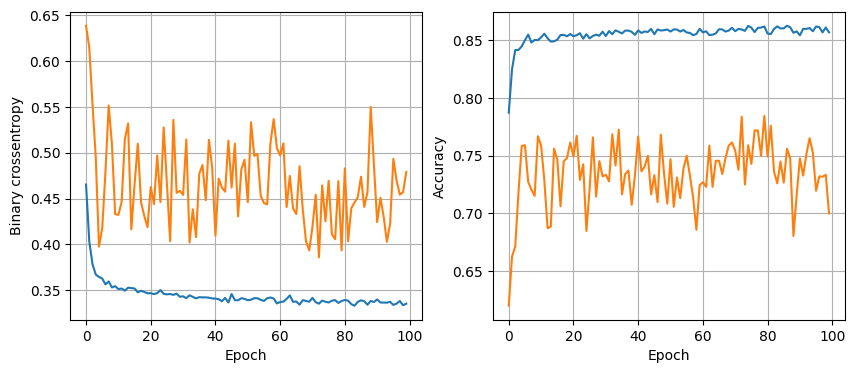

119/119 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8591
16 nodes, dropout 0.2, lr 0.01, batch size 128


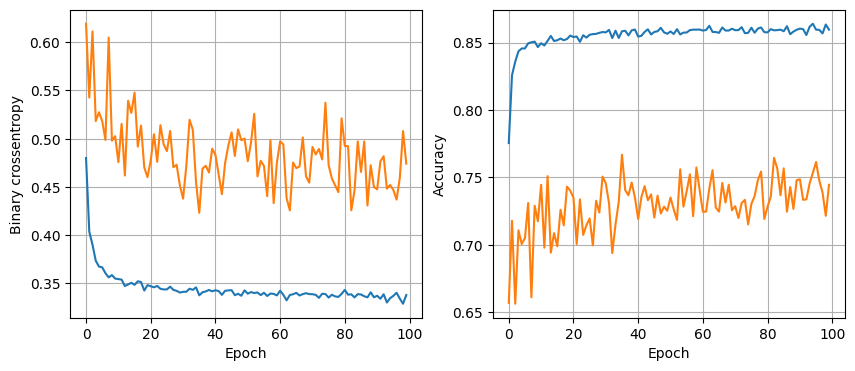

119/119 [==============================] - 0s 4ms/step - loss: 0.3203 - accuracy: 0.8615
16 nodes, dropout 0.2, lr 0.005, batch size 32


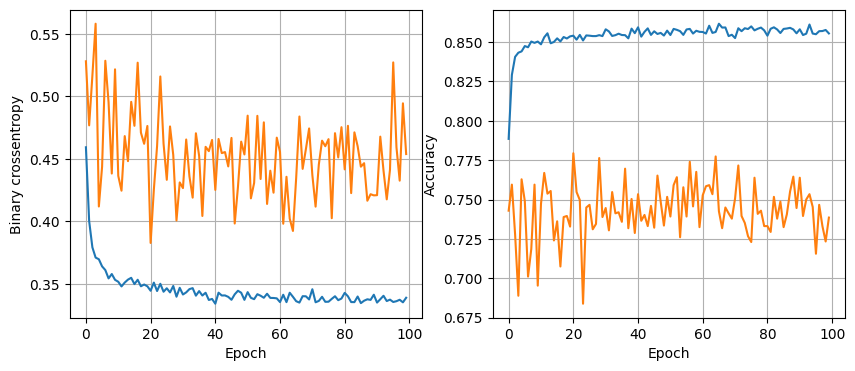

119/119 [==============================] - 1s 6ms/step - loss: 0.3183 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.005, batch size 64


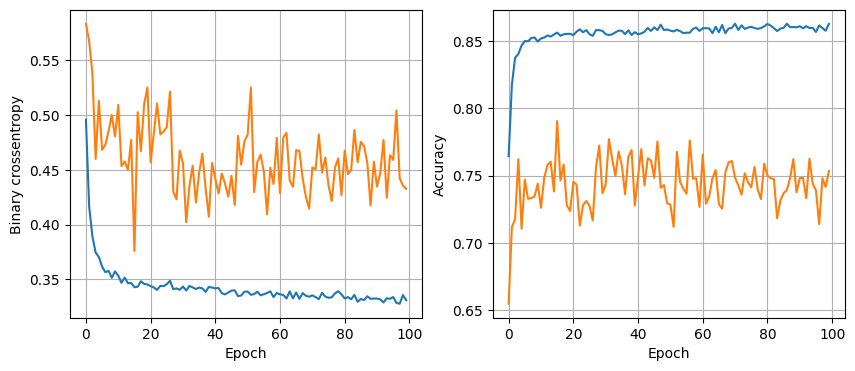

119/119 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8659
16 nodes, dropout 0.2, lr 0.005, batch size 128


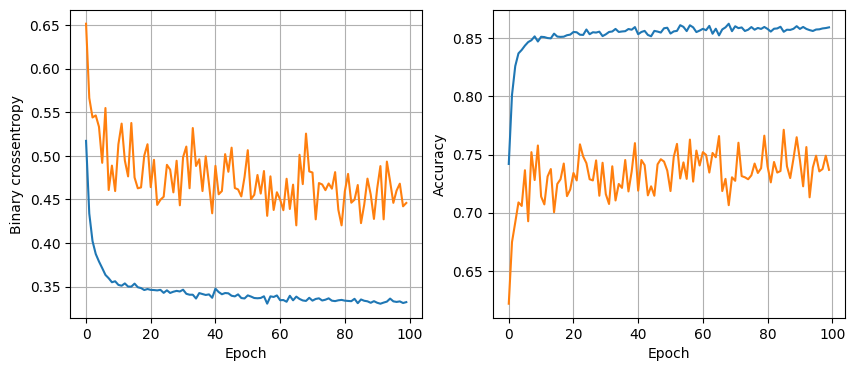

119/119 [==============================] - 0s 4ms/step - loss: 0.3194 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.001, batch size 32


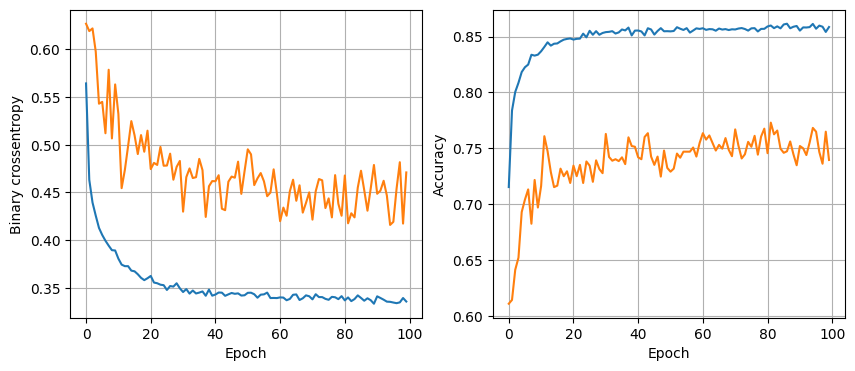

119/119 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8636
16 nodes, dropout 0.2, lr 0.001, batch size 64


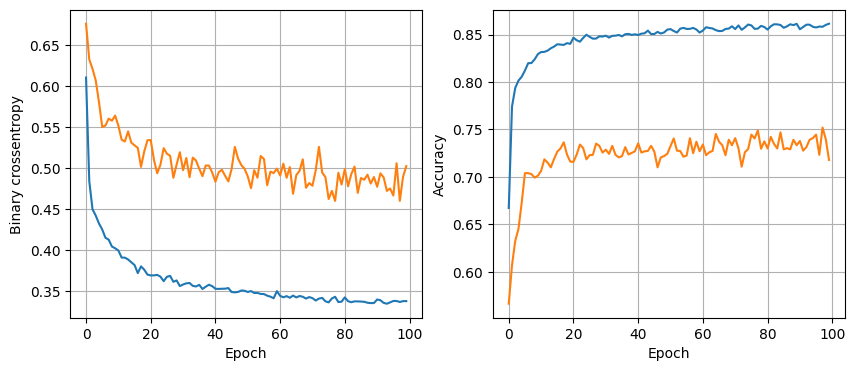

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8594
16 nodes, dropout 0.2, lr 0.001, batch size 128


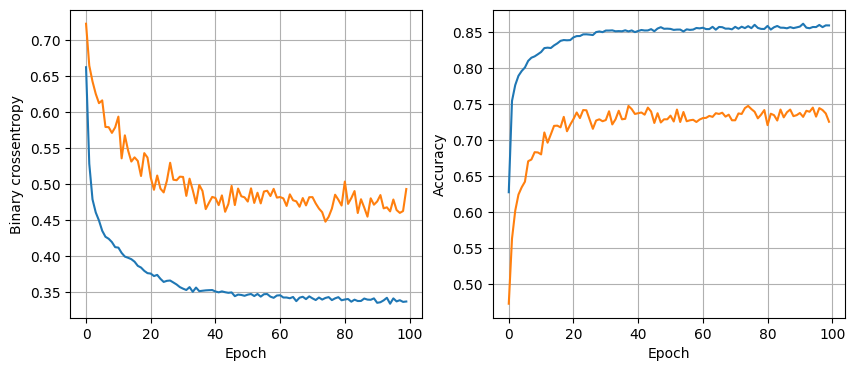

119/119 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.01, batch size 32


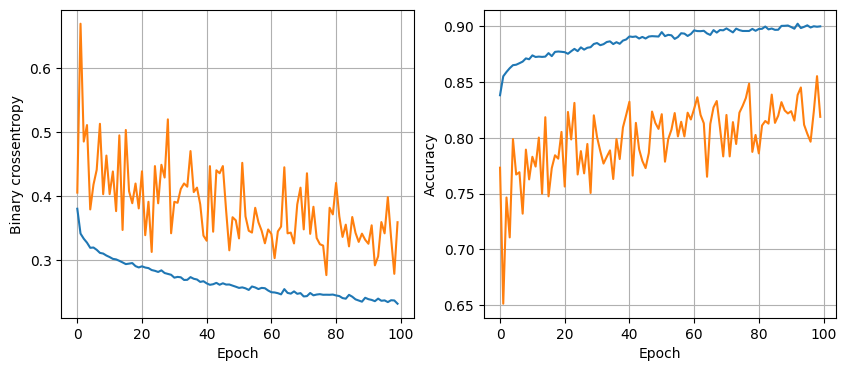

119/119 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.01, batch size 64


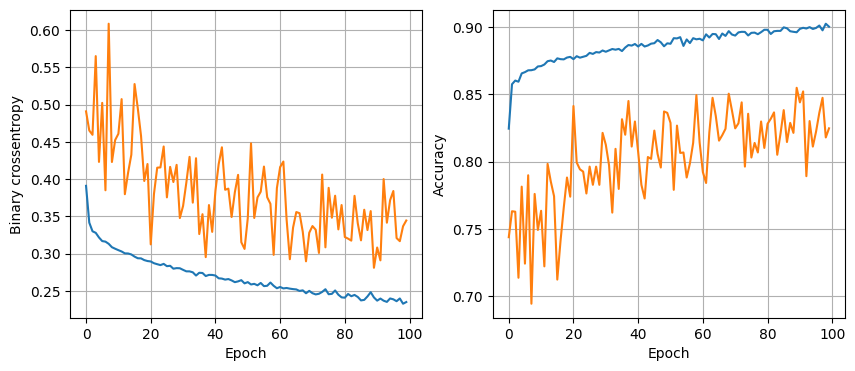

119/119 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8557
32 nodes, dropout 0, lr 0.01, batch size 128


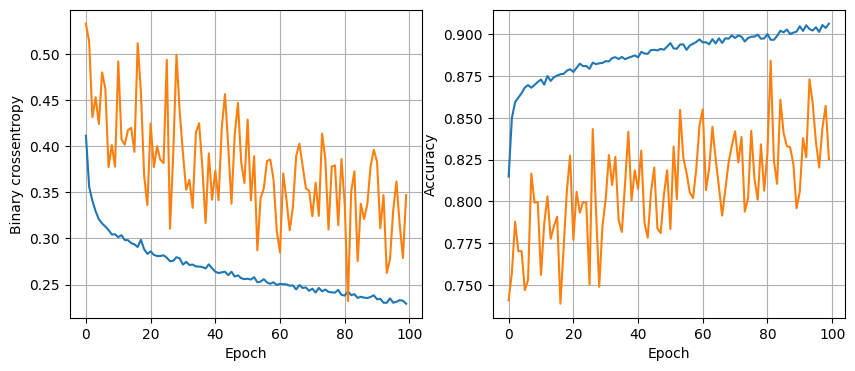

119/119 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.005, batch size 32


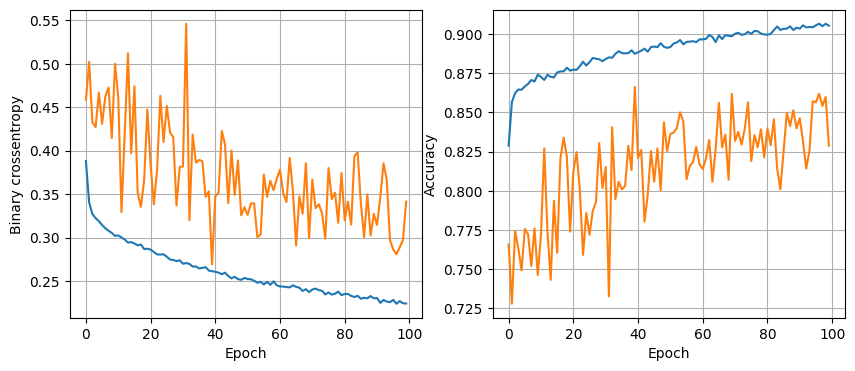

119/119 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8554
32 nodes, dropout 0, lr 0.005, batch size 64


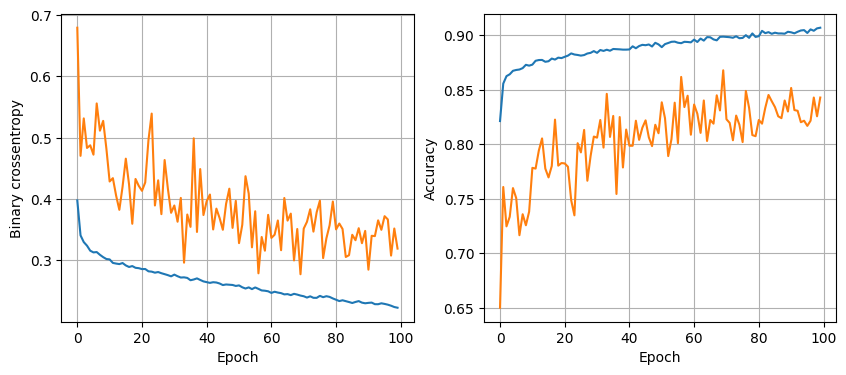

119/119 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8575
32 nodes, dropout 0, lr 0.005, batch size 128


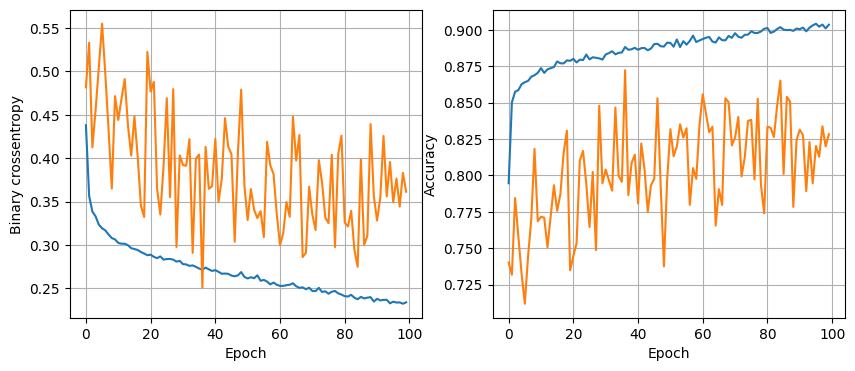

119/119 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8717
32 nodes, dropout 0, lr 0.001, batch size 32


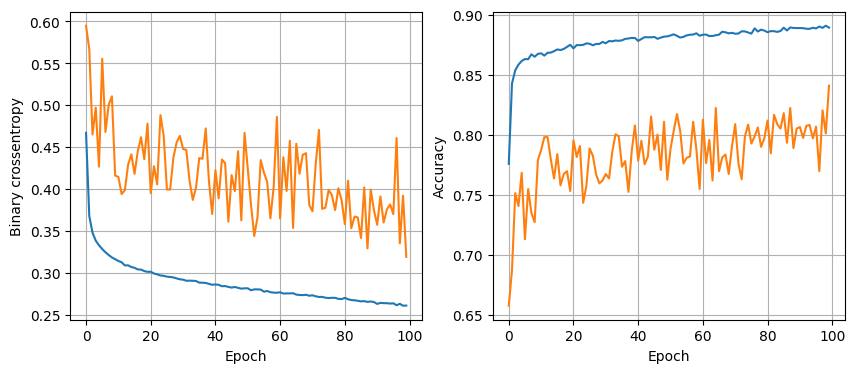

119/119 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8607
32 nodes, dropout 0, lr 0.001, batch size 64


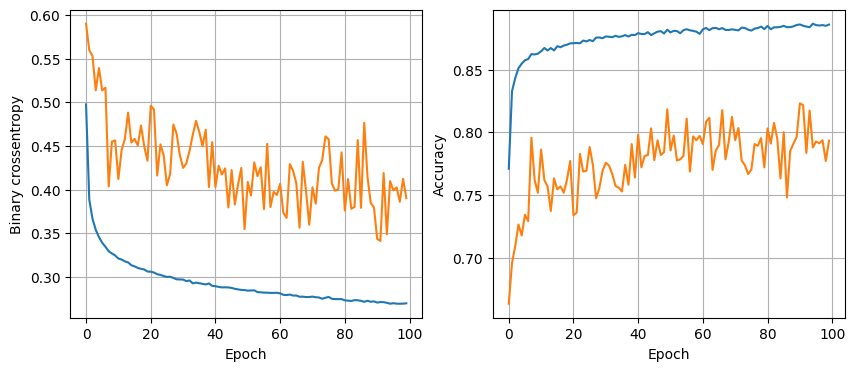

119/119 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8654
32 nodes, dropout 0, lr 0.001, batch size 128


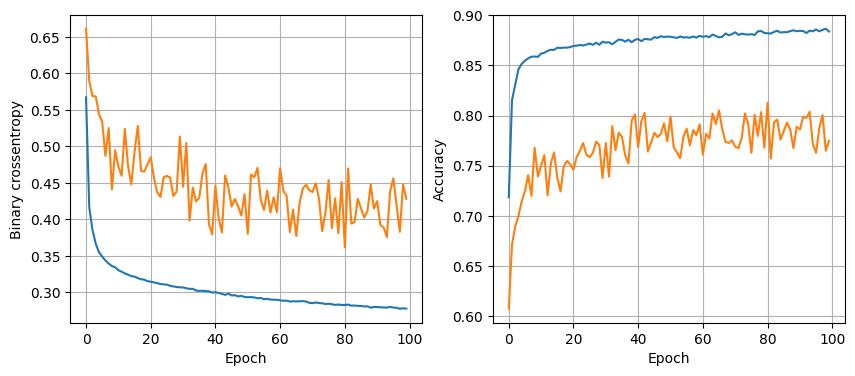

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8651
32 nodes, dropout 0.2, lr 0.01, batch size 32


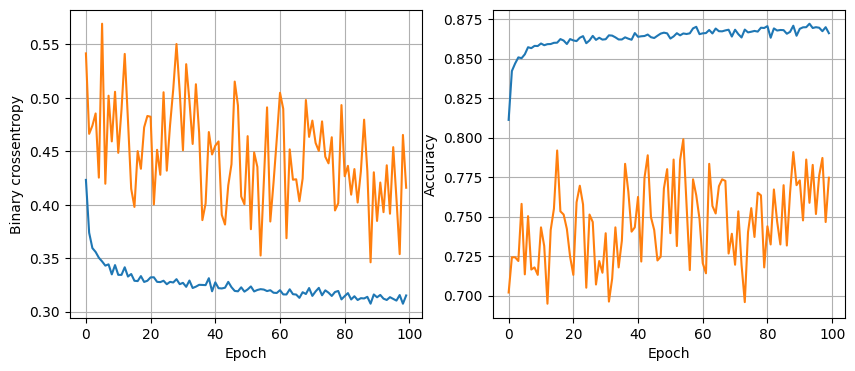

119/119 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8712
32 nodes, dropout 0.2, lr 0.01, batch size 64


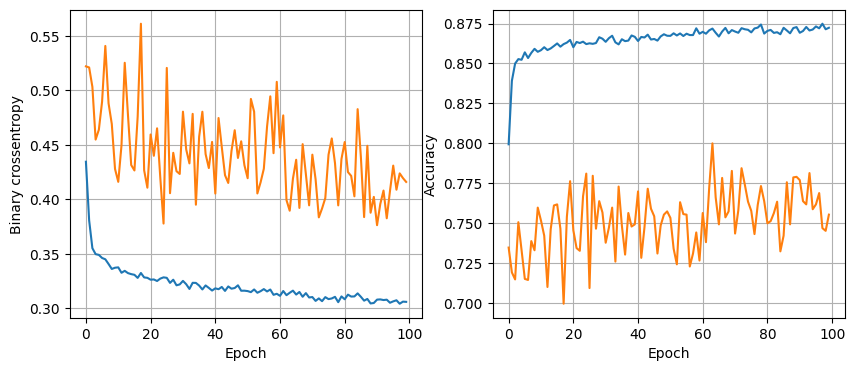

119/119 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.01, batch size 128


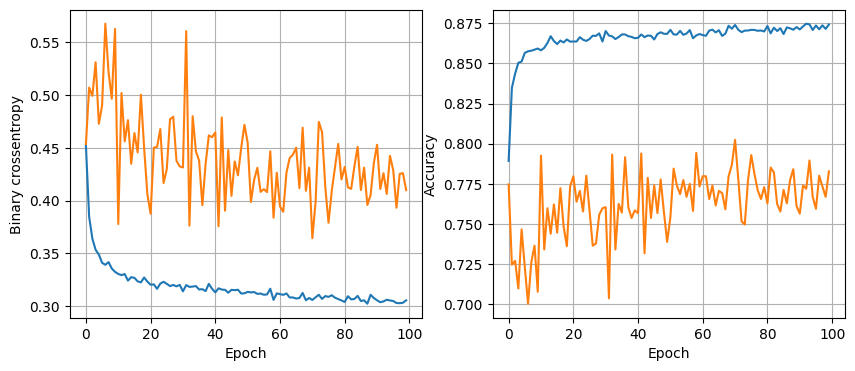

119/119 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8683
32 nodes, dropout 0.2, lr 0.005, batch size 32


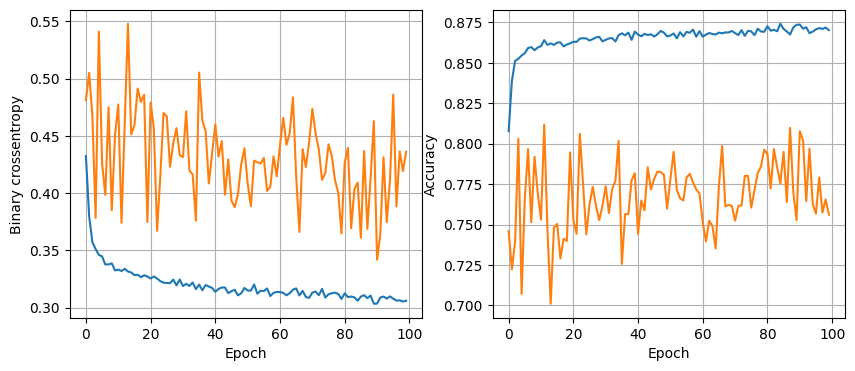

119/119 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.005, batch size 64


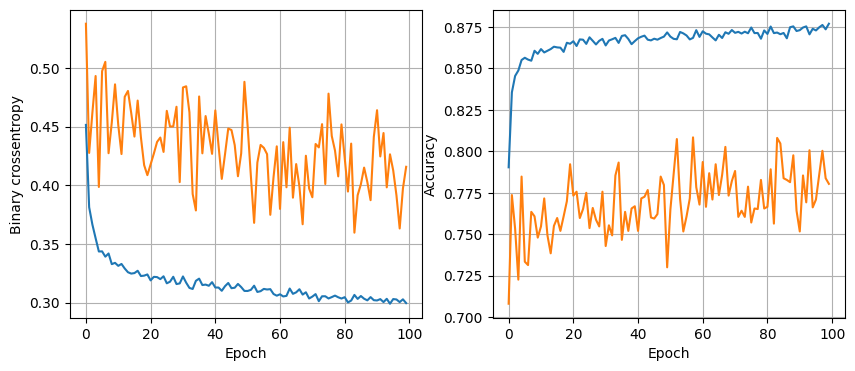

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8683
32 nodes, dropout 0.2, lr 0.005, batch size 128


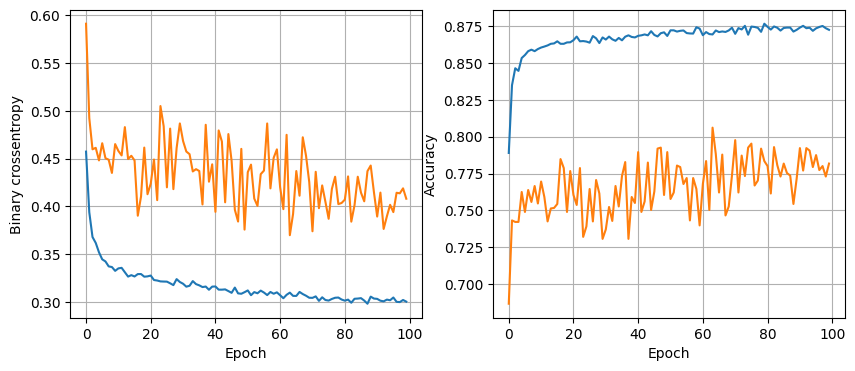

119/119 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8715
32 nodes, dropout 0.2, lr 0.001, batch size 32


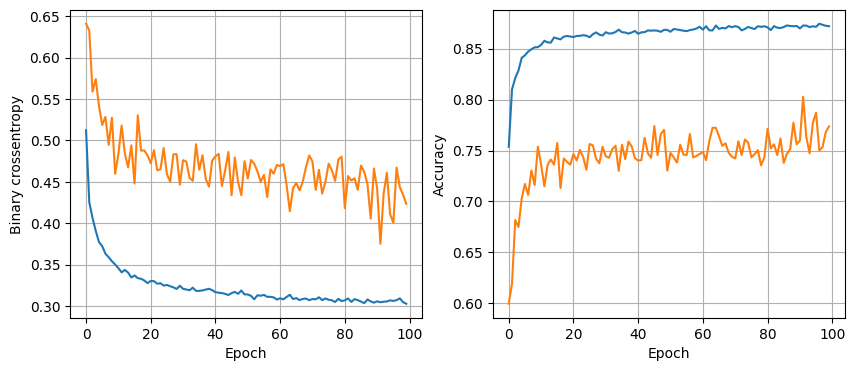

119/119 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.001, batch size 64


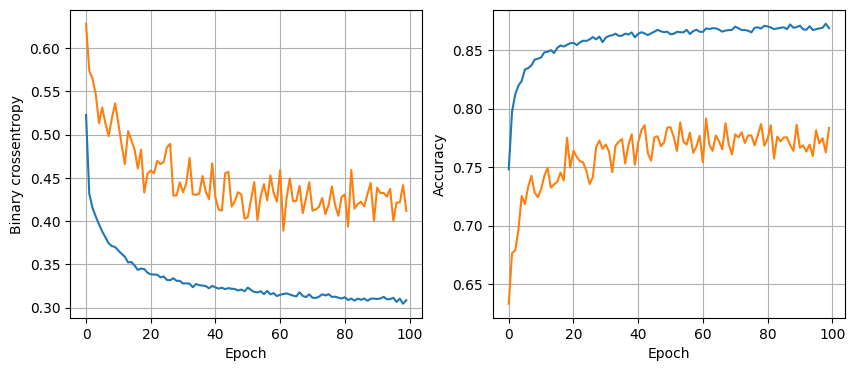

119/119 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8717
32 nodes, dropout 0.2, lr 0.001, batch size 128


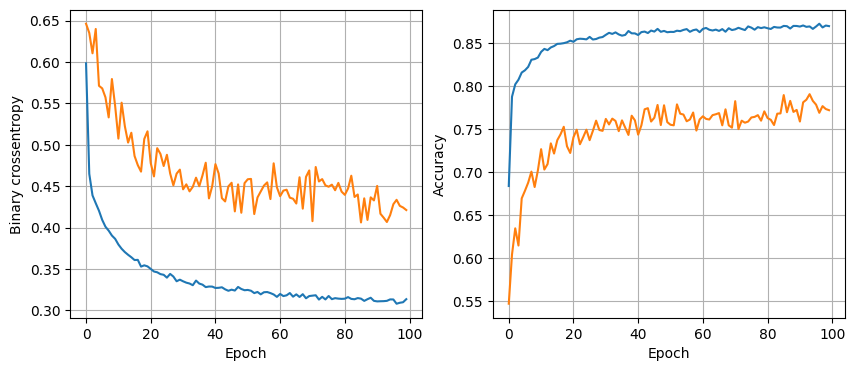

119/119 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8662
64 nodes, dropout 0, lr 0.01, batch size 32


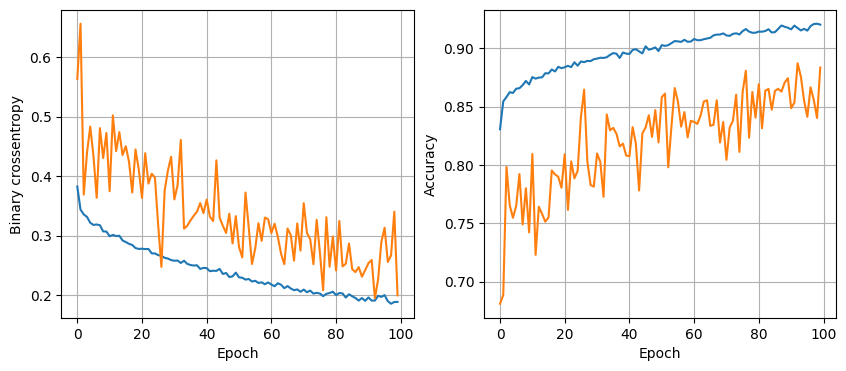

119/119 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.8601
64 nodes, dropout 0, lr 0.01, batch size 64


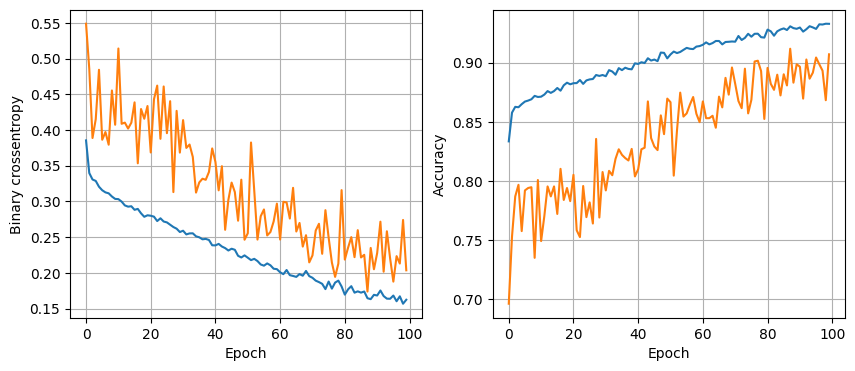

119/119 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.8502
64 nodes, dropout 0, lr 0.01, batch size 128


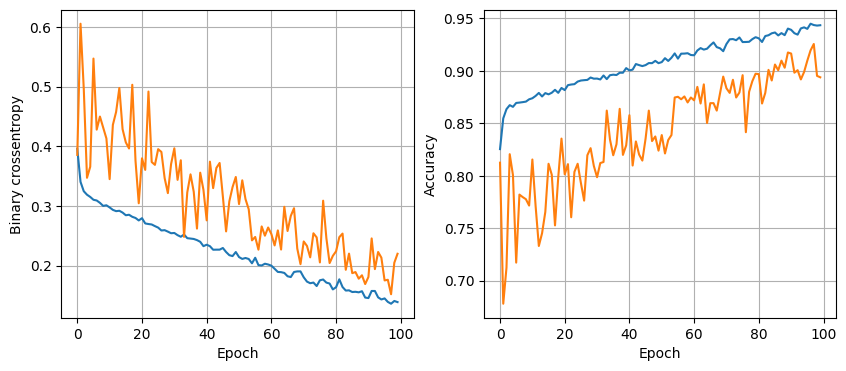

119/119 [==============================] - 0s 2ms/step - loss: 0.5708 - accuracy: 0.8483
64 nodes, dropout 0, lr 0.005, batch size 32


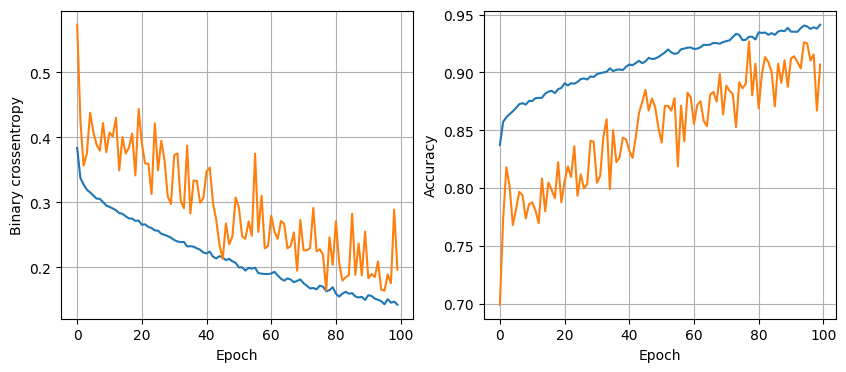

119/119 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.8530
64 nodes, dropout 0, lr 0.005, batch size 64


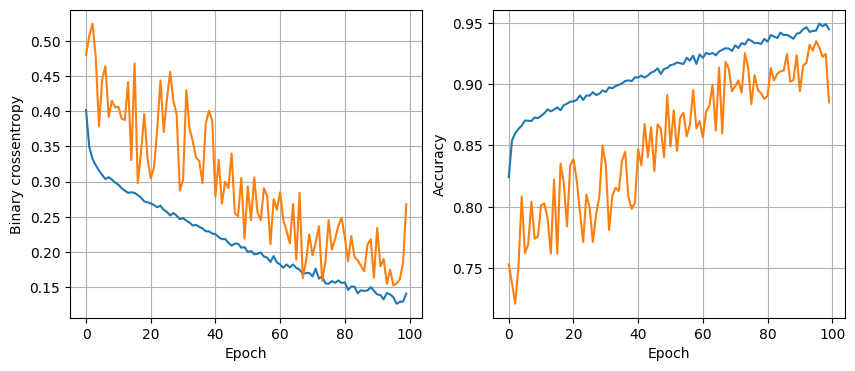

119/119 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.8557
64 nodes, dropout 0, lr 0.005, batch size 128


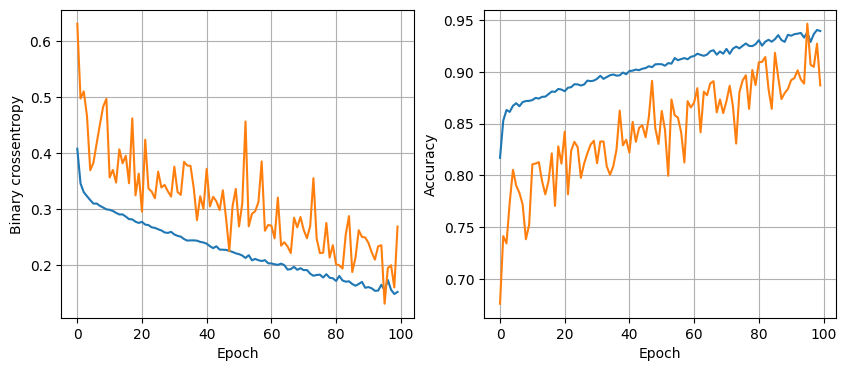

119/119 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.8523
64 nodes, dropout 0, lr 0.001, batch size 32


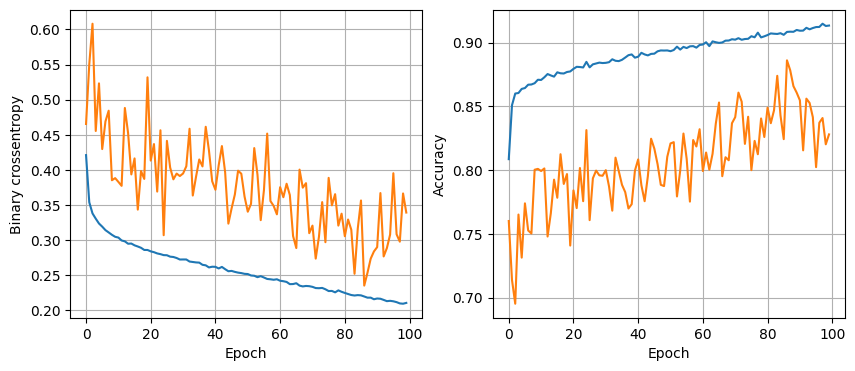

119/119 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8601
64 nodes, dropout 0, lr 0.001, batch size 64


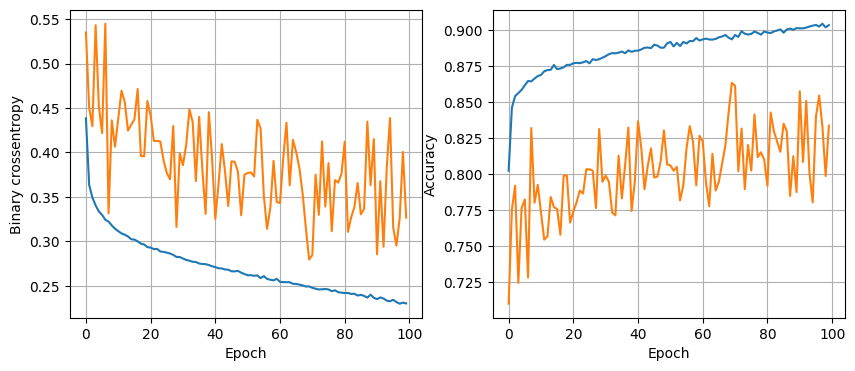

119/119 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8594
64 nodes, dropout 0, lr 0.001, batch size 128


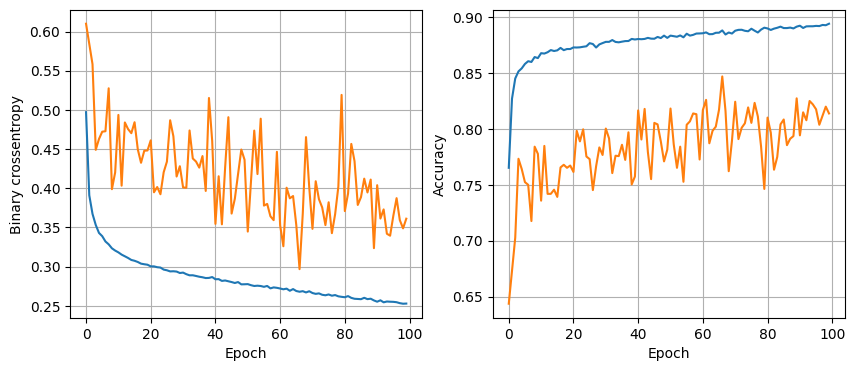

119/119 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8707
64 nodes, dropout 0.2, lr 0.01, batch size 32


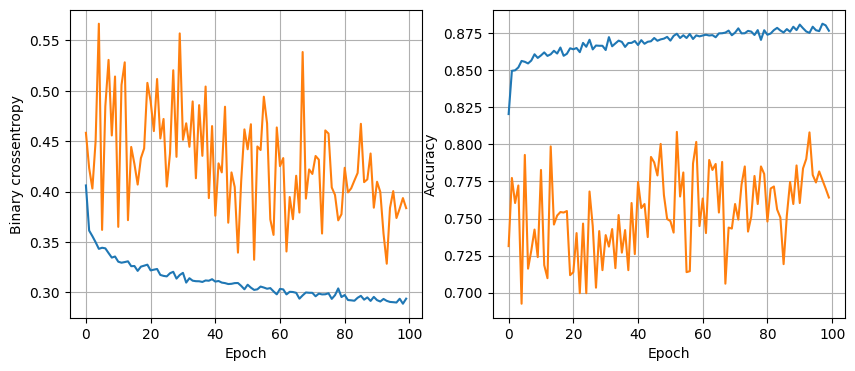

119/119 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8662
64 nodes, dropout 0.2, lr 0.01, batch size 64


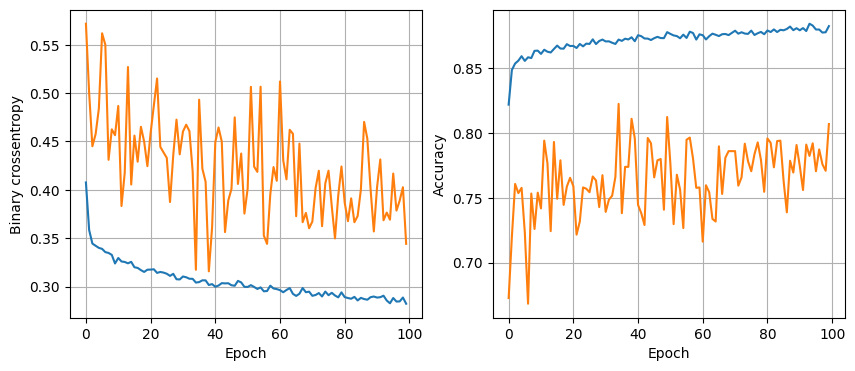

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8715
64 nodes, dropout 0.2, lr 0.01, batch size 128


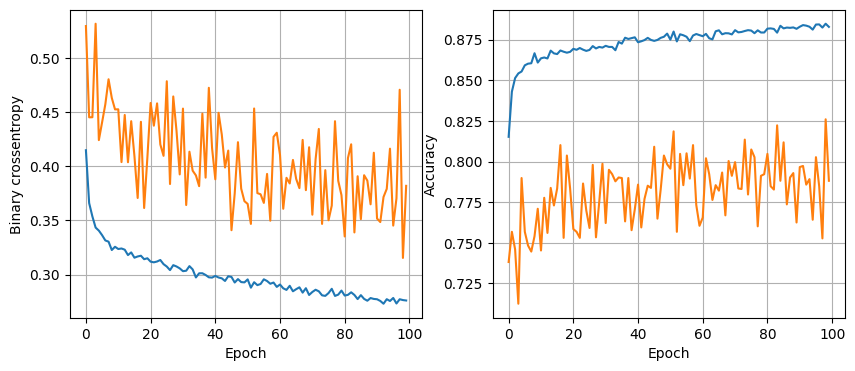

119/119 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8644
64 nodes, dropout 0.2, lr 0.005, batch size 32


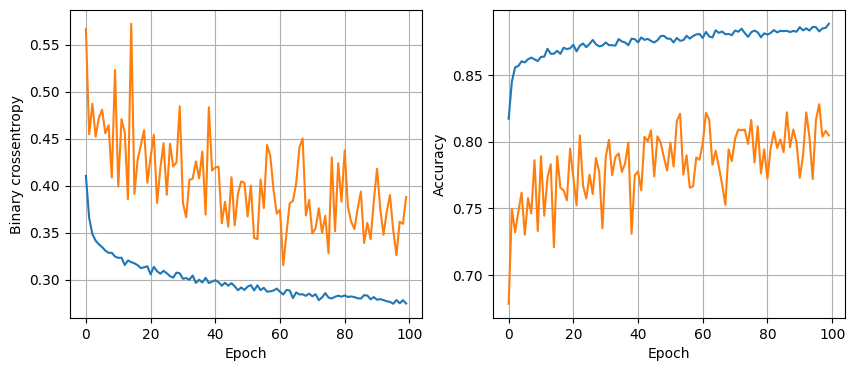

119/119 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.8751
64 nodes, dropout 0.2, lr 0.005, batch size 64


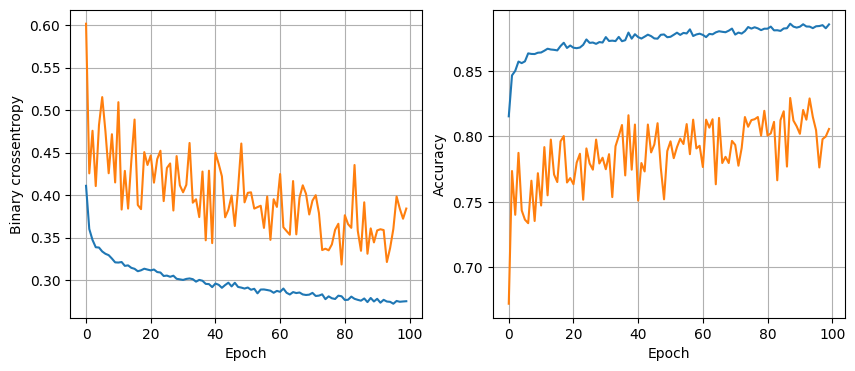

119/119 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8751
64 nodes, dropout 0.2, lr 0.005, batch size 128


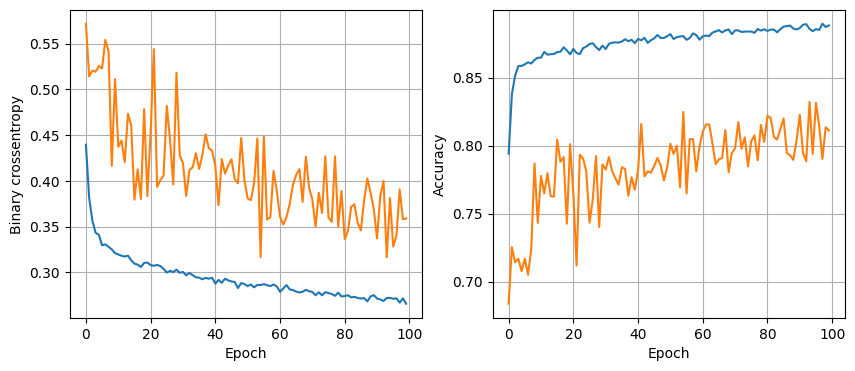

119/119 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.001, batch size 32


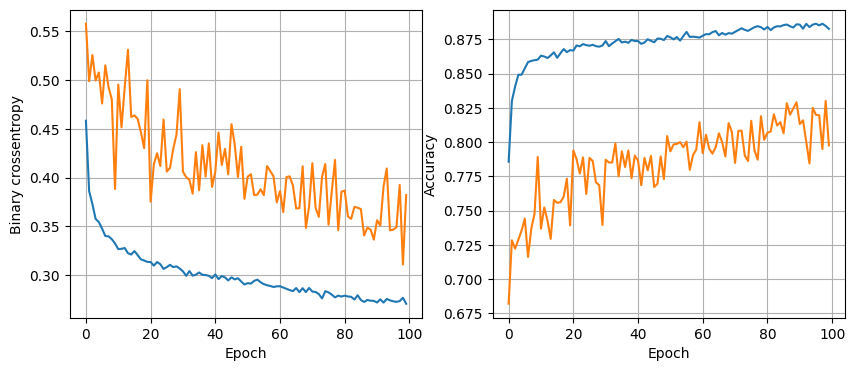

119/119 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8741
64 nodes, dropout 0.2, lr 0.001, batch size 64


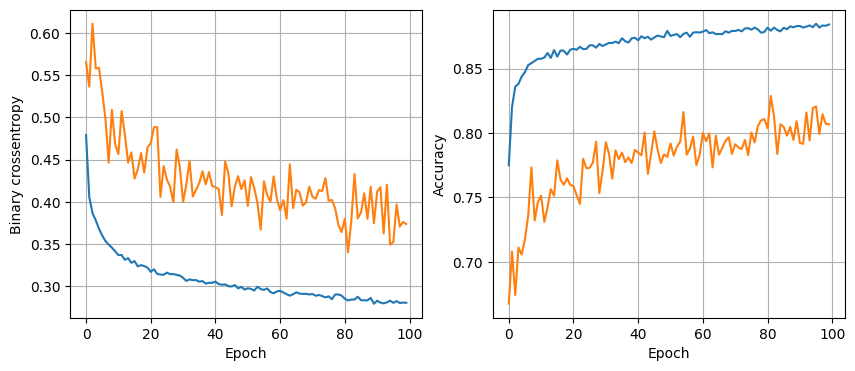

119/119 [==============================] - 0s 3ms/step - loss: 0.3117 - accuracy: 0.8715
64 nodes, dropout 0.2, lr 0.001, batch size 128


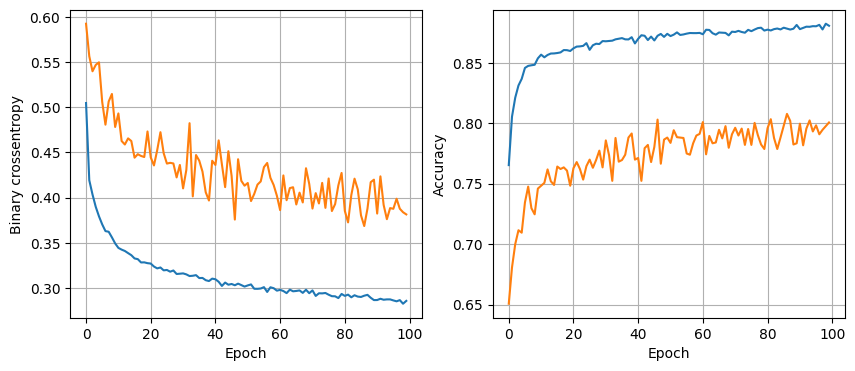

119/119 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.8707


In [35]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [36]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1343
           1       0.88      0.94      0.91      2461

    accuracy                           0.88      3804
   macro avg       0.88      0.86      0.87      3804
weighted avg       0.88      0.88      0.88      3804

